# Task 1 – Exploratory Data Analysis & Pre-processing
This notebook loads the CFPB complaints dataset, performs initial EDA, filters to the five target products, cleans the narratives, and saves a `filtered_complaints.csv` file to `data/`.
Run cell-by-cell or simply execute *Pre-processing* at the end.

In [1]:
# Set up paths
from pathlib import Path
import sys, os
PROJECT_ROOT = Path('..').resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
# Load utilities and define constants
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from utils.text_cleaning import clean_text
DATA_DIR = PROJECT_ROOT / 'data'
RAW_CSV = DATA_DIR / 'complaints.csv'

In [3]:
# Quick EDA load (read only the needed columns)
cols = [
    "Complaint ID",
    "Product",
    "Issue",
    "Consumer complaint narrative",
    "Date received",
]
df = pd.read_csv(RAW_CSV, usecols=cols, low_memory=False)

# (optional) make column names code-friendly
df.columns = (
    df.columns.str.lower()
              .str.replace(" ", "_")
              .str.replace("-", "_")
)

## Distribution of complaints by product

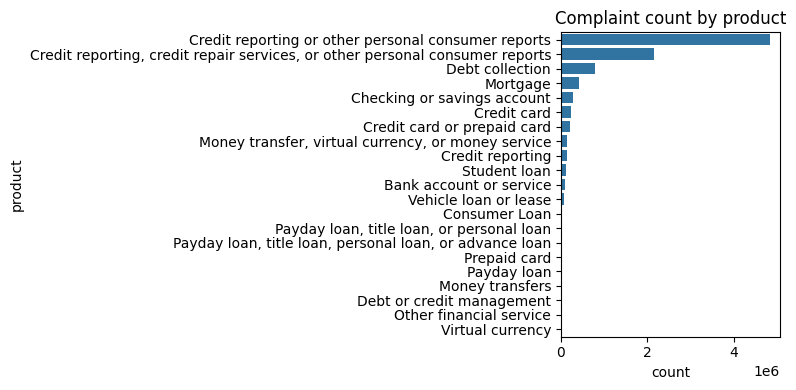

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(y='product', data=df, order=df['product'].value_counts().index)
plt.title('Complaint count by product')
plt.tight_layout()

## Narrative length distribution

In [ ]:
df['narrative_length'] = df['consumer_complaint_narrative'].fillna('').str.split().apply(len)
sns.histplot(df['narrative_length'], bins=50)
plt.xlabel('Words per narrative')

## Clean & Filter dataset

In [ ]:
allowed_products = {'Credit card','Personal loan','Buy Now, Pay Later (BNPL)','Savings account','Money transfers'}
filtered = df[df['product'].isin(allowed_products)].dropna(subset=['consumer_complaint_narrative']).copy()
filtered['clean_narrative'] = filtered['consumer_complaint_narrative'].apply(clean_text)
filtered = filtered[filtered['clean_narrative'].str.len()>0]
print(f'Filtered rows: {len(filtered):,}')

In [ ]:
filtered.to_csv(DATA_DIR / 'filtered_complaints.csv', index=False)
print('Saved to data/filtered_complaints.csv')